# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [3]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [4]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [5]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity           voltage     power             voltage            \
type                      armonic33 armonic34 armonic36 armonic12 armonic41   
2022-02-02 10:16:10+01:00  0.087048  0.000005 -0.000016  0.023735  0.069587   
2022-02-02 10:16:20+01:00  0.103064  0.000009 -0.000014  0.024547  0.059356   
2022-02-02 10:16:30+01:00  0.081137  0.000003 -0.000015  0.022265  0.049168   
2022-02-02 10:16:40+01:00  0.090520  0.000124  0.000022  0.024722  0.061188   
2022-02-02 10:16:50+01:00  0.086880 -0.000046  0.000198  0.023407  0.057654   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.054719  0.000005  0.000005  0.024024  0.042454   
2022-02-02 12:57:30+01:00  0.054927 -0.000003 -0.000003  0.024600  0.043786   
2022-02-02 12:57:40+01:00  0.053239  0.000007 -0.000007  0.023795  0.041985   
2022-02-02 12:57:50+01:00  0.053213  0.000006 -0.000003  0.019104  0.046350   
2022-02-02 12:58:00+01:00  0.051000  0.000007  0.000007  0.007008  0.036063   

physical_quantity                       power             current            \
type                      armonic34 armonic33 armonic13  armonic3 armonic40   
2022-02-02 10:16:10+01:00  0.011348  0.000098  0.000234  0.037412  0.001780   
2022-02-02 10:16:20+01:00  0.014871  0.000088  0.000257  0.036639  0.001710   
2022-02-02 10:16:30+01:00  0.014924  0.000029  0.000109  0.035772  0.001829   
2022-02-02 10:16:40+01:00  0.012684 -0.000016  0.003353  0.274522  0.013991   
2022-02-02 10:16:50+01:00  0.015519  0.002901 -0.002904  0.448819  0.047833   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.013567 -0.000055  0.000404  0.030133  0.001981   
2022-02-02 12:57:30+01:00  0.013014 -0.000082  0.000554  0.030061  0.001960   
2022-02-02 12:57:40+01:00  0.012122 -0.000040  0.000766  0.029516  0.001682   
2022-02-02 12:57:50+01:00  0.012247 -0.000081  0.000441  0.029987  0.001935   
2022-02-02 12:58:00+01:00  0.007398 -0.000109  0.000769  0.029602  0.001391   

physical_quantity          ...   voltage   current               voltage  \
type                       ...  armonic3 armonic12 armonic41    armonic1   
2022-02-02 10:16:10+01:00  ...  1.994479  0.004119  0.006253  243.908905   
2022-02-02 10:16:20+01:00  ...  1.989709  0.003627  0.005840  243.884567   
2022-02-02 10:16:30+01:00  ...  1.972401  0.003813  0.004648  243.829102   
2022-02-02 10:16:40+01:00  ...  1.994696  0.027127  0.015582  242.803909   
2022-02-02 10:16:50+01:00  ...  1.985540  0.052419  0.045342  239.976929   
...                        ...       ...       ...       ...         ...   
2022-02-02 12:57:20+01:00  ...  1.784224  0.006434  0.003456  242.252136   
2022-02-02 12:57:30+01:00  ...  1.792583  0.006103  0.003719  242.336334   
2022-02-02 12:57:40+01:00  ...  1.802811  0.006022  0.003719  242.093277   
2022-02-02 12:57:50+01:00  ...  1.785731  0.006471  0.003537  242.225677   
2022-02-02 12:58:00+01:00  ...  1.795632  0.006134  0.003614  242.316055   

physical_quantity           current         power     voltage            \
type                       armonic7     armonic42             armonic32   
2022-02-02 10:16:10+01:00  0.020444 -1.130000e-05  243.948563  0.013031   
2022-02-02 10:16:20+01:00  0.020253 -3.620000e-06  243.924240  0.015931   
2022-02-02 10:16:30+01:00  0.019219 -5.999990e-08  243.870300  0.014709   
2022-02-02 10:16:40+01:00  0.080388 -8.328000e-05  242.845306  0.013070   
2022-02-02 10:16:50+01:00  0.227013 -1.615800e-04  240.016556  0.014474   
...                             ...           ...         ...       ...   
2022-02-02 12:57:20+01:00  0.014674 -5.680000e-06  242.294617  0.013248   
2022-02-02 12:57:30+01:00  0.014967 -7.720000e-06  242.379272  0.011730   
2022-02-02 12:57:40+01:00  0.014817 -6.800001e-07  242.135498  0.010904   
2022-02-02 12:57:50+01:00  0.014745 -5.000000e-06  242.268982  0.011540   
2022-02-02 12:58:00+01:00  0.015202  9.999999e-07  242.

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [6]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           voltage     power             voltage            \
type                      armonic33 armonic34 armonic36 armonic12 armonic41   
2022-02-02 10:16:10+01:00  0.082797  0.000015 -0.000016  0.019901  0.071917   
2022-02-02 10:16:20+01:00  0.085149  0.000014 -0.000014  0.014934  0.054648   
2022-02-02 10:16:30+01:00  0.080491  0.000008 -0.000029  0.015720  0.057454   
2022-02-02 10:16:40+01:00  0.078914 -0.000016  0.000009  0.030837  0.042381   
2022-02-02 10:16:50+01:00  0.095672 -0.000004  0.000029  0.020009  0.084235   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.046728  0.000024  0.000006  0.024039  0.036156   
2022-02-02 12:57:30+01:00  0.051895 -0.000007  0.000005  0.018721  0.036637   
2022-02-02 12:57:40+01:00  0.047617 -0.000002 -0.000007  0.021788  0.028638   
2022-02-02 12:57:50+01:00  0.059153  0.000008 -0.000001  0.019183  0.041158   
2022-02-02 12:58:00+01:00  0.051000  0.000007  0.000007  0.007008  0.036063   

physical_quantity                       power             current            \
type                      armonic34 armonic33 armonic13  armonic3 armonic40   
2022-02-02 10:16:10+01:00  0.011938  0.000140  0.000376  0.037077  0.001813   
2022-02-02 10:16:20+01:00  0.016603  0.000078  0.000108  0.036836  0.001829   
2022-02-02 10:16:30+01:00  0.020304  0.000036  0.000143  0.036576  0.001671   
2022-02-02 10:16:40+01:00  0.009816  0.000034  0.000119  0.035570  0.002113   
2022-02-02 10:16:50+01:00  0.010934  0.000795  0.003392  0.567056  0.003423   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.014518 -0.000040  0.000043  0.030170  0.001877   
2022-02-02 12:57:30+01:00  0.009306 -0.000075  0.000561  0.029547  0.001655   
2022-02-02 12:57:40+01:00  0.015433 -0.000074  0.000767  0.029501  0.001183   
2022-02-02 12:57:50+01:00  0.012179 -0.000007  0.000310  0.030163  0.001841   
2022-02-02 12:58:00+01:00  0.007398 -0.000109  0.000769  0.029602  0.001391   

physical_quantity          ...   voltage   current               voltage  \
type                       ...  armonic3 armonic12 armonic41    armonic1   
2022-02-02 10:16:10+01:00  ...  1.994036  0.004649  0.006056  243.911774   
2022-02-02 10:16:20+01:00  ...  1.983948  0.003805  0.005773  243.908646   
2022-02-02 10:16:30+01:00  ...  1.988522  0.004139  0.004832  243.876205   
2022-02-02 10:16:40+01:00  ...  1.979661  0.004250  0.004645  243.851074   
2022-02-02 10:16:50+01:00  ...  1.967427  0.005387  0.007590  239.940369   
...                        ...       ...       ...       ...         ...   
2022-02-02 12:57:20+01:00  ...  1.785885  0.007536  0.003263  242.193741   
2022-02-02 12:57:30+01:00  ...  1.791802  0.006927  0.003670  242.421570   
2022-02-02 12:57:40+01:00  ...  1.834808  0.005766  0.003436  242.010193   
2022-02-02 12:57:50+01:00  ...  1.786476  0.006856  0.003435  241.985153   
2022-02-02 12:58:00+01:00  ...  1.795632  0.006134  0.003614  242.316055   

physical_quantity           current         power     voltage            \
type                       armonic7     armonic42             armonic32   
2022-02-02 10:16:10+01:00  0.021043 -1.050000e-05  243.951508  0.012113   
2022-02-02 10:16:20+01:00  0.021210  4.800000e-06  243.947998  0.016345   
2022-02-02 10:16:30+01:00  0.019559 -2.760000e-05  243.916595  0.017251   
2022-02-02 10:16:40+01:00  0.017861 -2.040000e-05  243.891998  0.012683   
2022-02-02 10:16:50+01:00  0.136538  2.400002e-06  239.979401  0.017203   
...                             ...           ...         ...       ...   
2022-02-02 12:57:20+01:00  0.014316  1.440000e-05  242.236206  0.015639   
2022-02-02 12:57:30+01:00  0.015514 -7.600000e-06  242.464600  0.013576   
2022-02-02 12:57:40+01:00  0.014290 -8.200001e-06  242.054001  0.008385   
2022-02-02 12:57:50+01:00  0.014311 -2.600000e-06  242.027405  0.014459   
2022-02-02 12:58:00+01:00  0.015202  9.999999e-07  242.

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

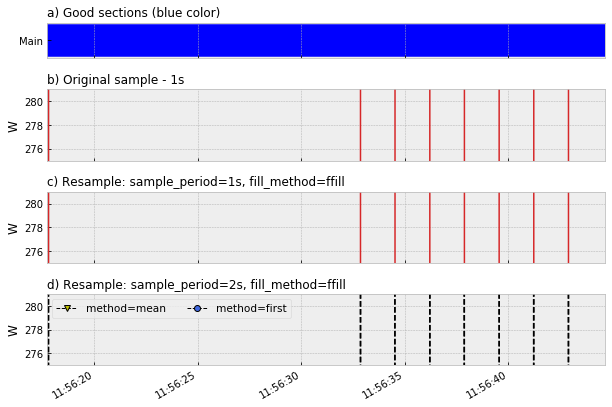

In [7]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [8]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [9]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [10]:
train = DataSet('dsualmh.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-02-02 10:16:00", end="2022-02-02 10:58:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 10:58:00+01:00', empty=False)

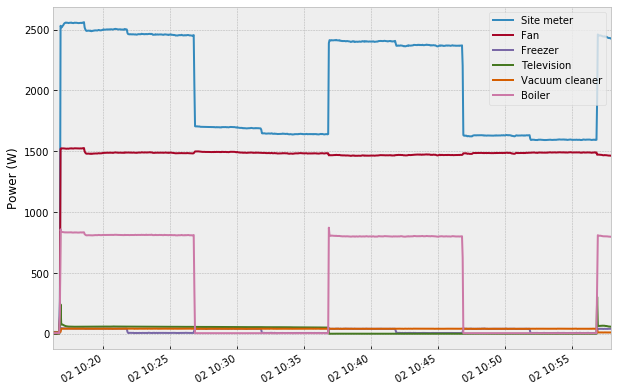

In [11]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [12]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2022-02-02 10:58:00", end="2022-02-02 12:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:58:00+01:00', end='2022-02-02 12:00:00+01:00', empty=False)

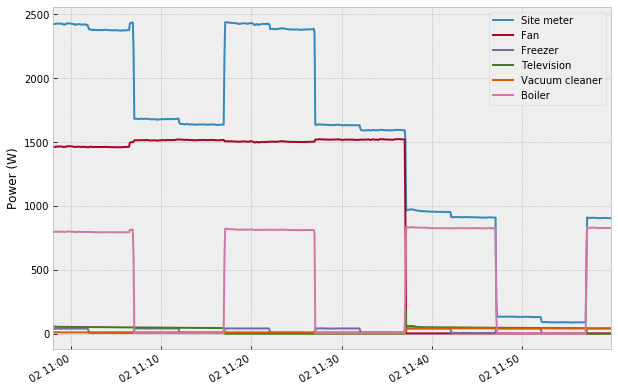

In [13]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [14]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2022-02-02 10:00:00", end="2022-02-02 13:00:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

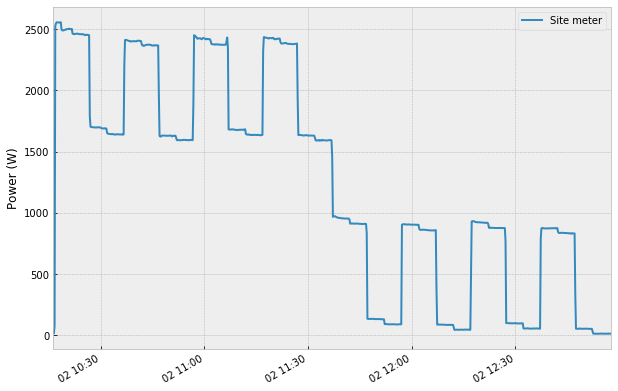

In [15]:
test_elec.mains().plot()